In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from tensorflow import keras


BEST NETWORK PARAMETERS:
((160, 128), 'relu', 0.2, 'adam'): auc=0.762, acc=0.691
((160, 160, 128, 64), 'relu', 0.2, 'adam'): auc=0.758, acc=0.687
((128, 128, 64), 'relu', 0.2, 'adam'): auc=0.756, acc=0.686
((128, 128, 128, 64), 'relu', 0.2, 'adam'): auc=0.755, acc=0.685
((160, 160, 128, 32), 'relu', 0.2, 'adam'): auc=0.755, acc=0.688


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


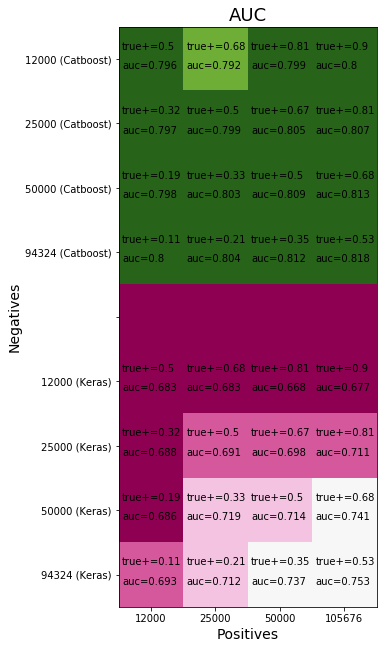

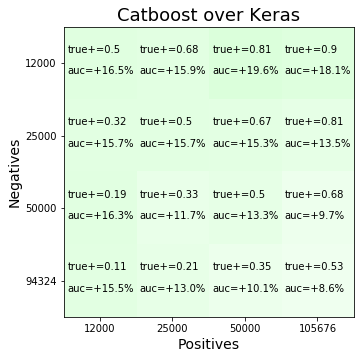

---- METRICS SUMMARY ----
  accuracy: catboost=0.737 (+7.87%), keras=0.683 (-7.30%)

      loss: catboost=0.519 (-12.28%), keras=0.592 (+14.00%)

   roc_auc: catboost=0.818 (+8.63%), keras=0.753 (-7.94%)

-------------------------


In [3]:
from base_experiment import BaseExperiment

class HiggsSmallExperiment(BaseExperiment):
    POSITIVE_STEPS = [12000, 25000, 50000, 105676]
    NEGATIVE_STEPS = [12000, 25000, 50000, 94324]
    PLOT_FIG_SIZE = (8, 10.67)

    def get_dataset(self):
        columns = [
            'is_signal',
            'lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude', 'missing_energy_phi',
            'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_b_tag',
            'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_b_tag',
            'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_b_tag',
            'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b_tag',
            'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb',
        ]
        df = pd.read_csv('higgs_small.csv', names=columns)
#         df = df[:500]
        y = df['is_signal']
        X = df.drop(columns='is_signal')
        return X, y, []

HiggsSmallExperiment().run()